In [1]:
!pip install matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from matplotlib import pyplot as plt
import pandas as pd

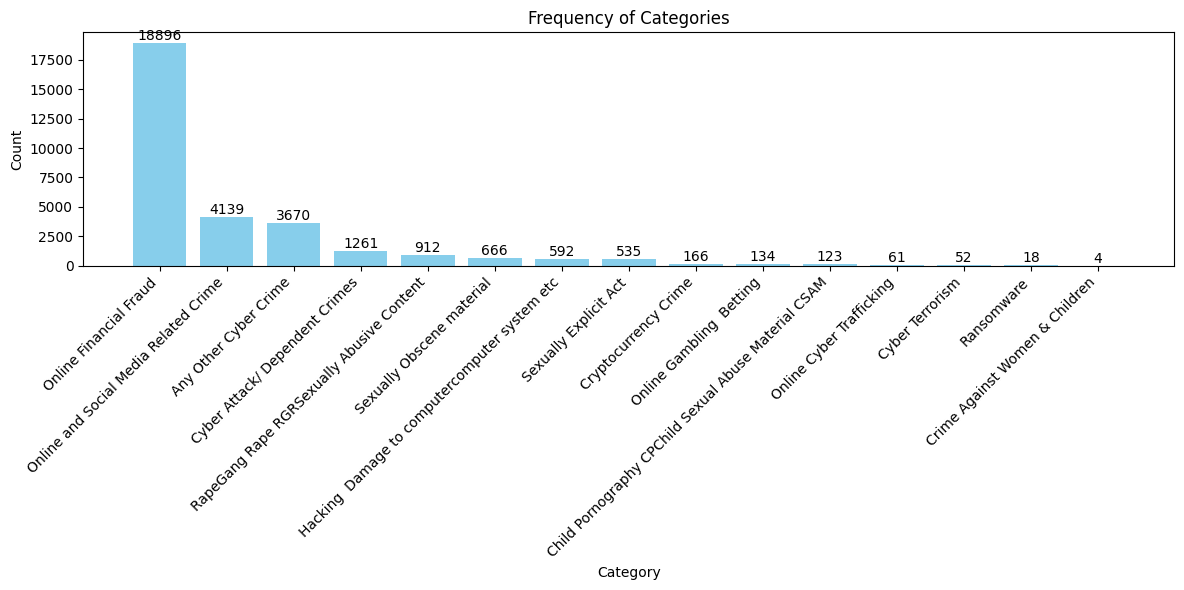

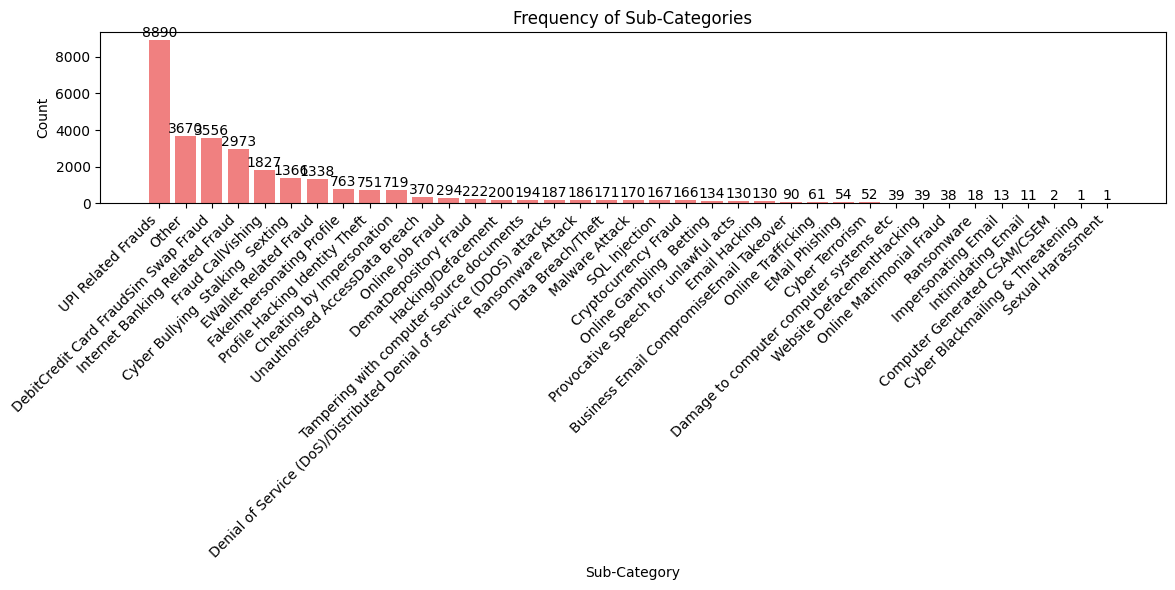

                                         Sub-Category  Count
0                                  UPI Related Frauds   8890
1                                               Other   3670
2                DebitCredit Card FraudSim Swap Fraud   3556
3                      Internet Banking Related Fraud   2973
4                                   Fraud CallVishing   1827
5                   Cyber Bullying  Stalking  Sexting   1366
6                               EWallet Related Fraud   1338
7                           FakeImpersonating Profile    763
8                      Profile Hacking Identity Theft    751
9                           Cheating by Impersonation    719
10                     Unauthorised AccessData Breach    370
11                                   Online Job Fraud    294
12                              DematDepository Fraud    222
13                                 Hacking/Defacement    200
14           Tampering with computer source documents    194
15  Denial of Service (D

In [12]:
# Load the dataset
df = pd.read_csv('dataset/test.csv', encoding='ISO-8859-1')

# Step 1: Count the occurrences of each category and sub_category
category_count = df['category'].value_counts().reset_index()
category_count.columns = ['Category', 'Count']

sub_category_count = df['sub_category'].value_counts().reset_index()
sub_category_count.columns = ['Sub-Category', 'Count']

# Step 2: Create a bar plot for the counts of categories
plt.figure(figsize=(12, 6))
plt.bar(category_count['Category'], category_count['Count'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of Categories')
plt.xticks(rotation=45, ha='right')
for i in range(len(category_count)):
    plt.annotate(f'{category_count["Count"].iloc[i]}', 
                 xy=(category_count['Category'].iloc[i], category_count['Count'].iloc[i] + 0.5),
                 ha='center', va='bottom', color='black')
plt.tight_layout()
plt.show()

# Step 3: Create a bar plot for the counts of sub-categories
plt.figure(figsize=(12, 6))
plt.bar(sub_category_count['Sub-Category'], sub_category_count['Count'], color='lightcoral')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Frequency of Sub-Categories')
plt.xticks(rotation=45, ha='right')
for i in range(len(sub_category_count)):
    plt.annotate(f'{sub_category_count["Count"].iloc[i]}', 
                 xy=(sub_category_count['Sub-Category'].iloc[i], sub_category_count['Count'].iloc[i] + 0.5),
                 ha='center', va='bottom', color='black')
plt.tight_layout()
plt.show()
print(sub_category_count)

In [4]:
# Step 1: Check for missing values in the dataset
print("Missing values per column:")
print(df.isnull().sum())  # This will show the count of missing values per column

# Step 2: Drop rows with any missing values
df_cleaned_drop = df.dropna()

# Check the cleaned dataset after removing rows with missing values
print("\nDataset after dropping rows with missing values:")
print(df_cleaned_drop)


Missing values per column:
category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64

Dataset after dropping rows with missing values:
                                    category  \
0      Online and Social Media Related Crime   
1                     Online Financial Fraud   
2                   Online Gambling  Betting   
3      Online and Social Media Related Crime   
4                     Online Financial Fraud   
...                                      ...   
93681                 Online Financial Fraud   
93682                 Online Financial Fraud   
93683                 Online Financial Fraud   
93684  Online and Social Media Related Crime   
93685                 Online Financial Fraud   

                            sub_category  \
0      Cyber Bullying  Stalking  Sexting   
1                      Fraud CallVishing   
2               Online Gambling  Betting   
3                       Online Job Fraud   
4                      Fraud Cal

In [5]:
# Step 3: Find duplicate rows based on all columns
duplicates = df[df.duplicated()]

# Step 4: Display the duplicate rows
print("\nDuplicate Rows Based on All Columns:")
print(duplicates)

# Step 5: Remove duplicates from the dataset
df_cleaned = df_cleaned_drop.drop_duplicates()

# Check the dataset after dropping duplicate rows
print("\nDataset after removing duplicate rows:")
print(df_cleaned)


Duplicate Rows Based on All Columns:
                                        category        sub_category  \
77     RapeGang Rape RGRSexually Abusive Content                 NaN   
92     RapeGang Rape RGRSexually Abusive Content                 NaN   
98     RapeGang Rape RGRSexually Abusive Content                 NaN   
117    RapeGang Rape RGRSexually Abusive Content                 NaN   
129    RapeGang Rape RGRSexually Abusive Content                 NaN   
...                                          ...                 ...   
93653  RapeGang Rape RGRSexually Abusive Content                 NaN   
93659                     Online Financial Fraud  UPI Related Frauds   
93667  RapeGang Rape RGRSexually Abusive Content                 NaN   
93668                     Online Financial Fraud  UPI Related Frauds   
93678  RapeGang Rape RGRSexually Abusive Content                 NaN   

                                      crimeaditionalinfo  
77     Respected Sir\r\n\r\nA very ser

Data after removing duplicates and adding 'word_count' column:
                                category                       sub_category  \
0  Online and Social Media Related Crime  Cyber Bullying  Stalking  Sexting   
1                 Online Financial Fraud                  Fraud CallVishing   
2               Online Gambling  Betting           Online Gambling  Betting   
3  Online and Social Media Related Crime                   Online Job Fraud   
4                 Online Financial Fraud                  Fraud CallVishing   

   word_count  
0          46  
1          45  
2          40  
3          98  
4          37  


/tmp/ipykernel_16866/3651105105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['word_count'] = df_cleaned['crimeaditionalinfo'].apply(lambda x: len(str(x).split()))


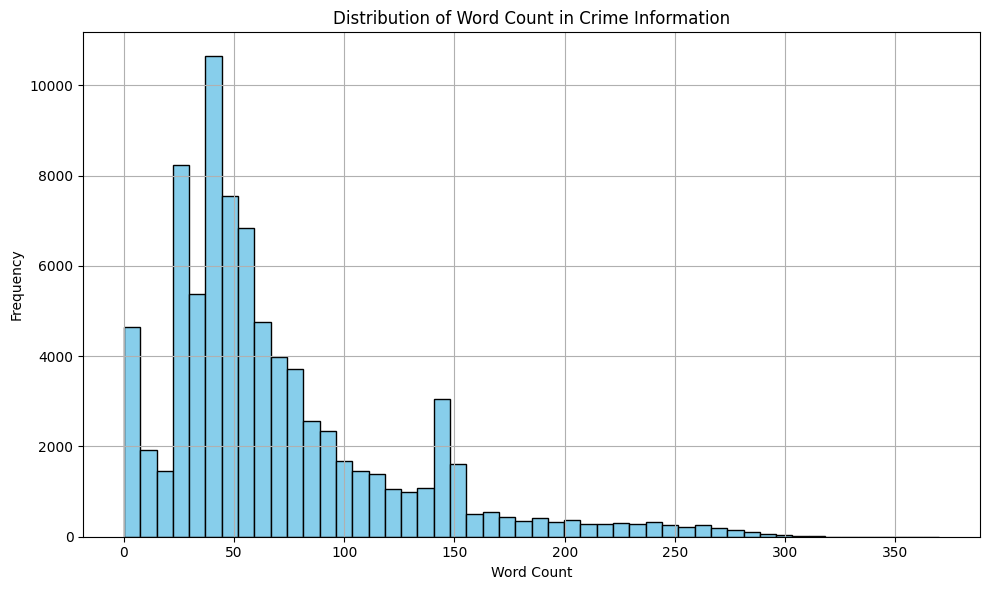

Cleaned data with word count saved to 'cleaned_data_with_word_count.csv'.


In [6]:
# Step 2: Add a new column 'word_count' that contains the word count for 'crimeaditionalinfo'
df_cleaned['word_count'] = df_cleaned['crimeaditionalinfo'].apply(lambda x: len(str(x).split()))

# Step 3: Display the cleaned DataFrame with the new 'word_count' column
print("Data after removing duplicates and adding 'word_count' column:")
print(df_cleaned[['category', 'sub_category', 'word_count']].head())

# Step 4: Visualize the word count distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Count in Crime Information')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, save the cleaned dataset with the 'word_count' column to a new CSV file
df_cleaned.to_csv('dataset/cleaned_data_with_word_count.csv', index=False)

print("Cleaned data with word count saved to 'cleaned_data_with_word_count.csv'.")


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset/test.csv')  # Replace with correct path

# Step 1: Filter rows where 'crimeaditionalinfo' column is NaN
nan_rows = df[df['crimeaditionalinfo'].isna()]

# Step 2: Print the NaN rows
print("Rows with NaN values in 'crimeaditionalinfo':")
print(nan_rows)

# Step 3: Drop rows with NaN values in the 'crimeaditionalinfo' column
df_cleaned = df.dropna(subset=['crimeaditionalinfo'])

# Step 4: Display the cleaned dataset after deleting NaN rows
print("\nDataset after removing rows with NaN values:")
print(df_cleaned)

# Optionally, save the cleaned dataset to a new CSV file
df_cleaned.to_csv('dataset/cleaned_dataset_test.csv', index=False)


Rows with NaN values in 'crimeaditionalinfo':
                        category                          sub_category  \
4077      Online Financial Fraud                    UPI Related Frauds   
5550      Online Financial Fraud  DebitCredit Card FraudSim Swap Fraud   
23273     Online Financial Fraud                     Fraud CallVishing   
25090     Online Financial Fraud                    UPI Related Frauds   
26341     Online Financial Fraud                    UPI Related Frauds   
29991     Online Financial Fraud                    UPI Related Frauds   
30268  Sexually Obscene material                                   NaN   

      crimeaditionalinfo  
4077                 NaN  
5550                 NaN  
23273                NaN  
25090                NaN  
26341                NaN  
29991                NaN  
30268                NaN  

Dataset after removing rows with NaN values:
                                        category  \
0      RapeGang Rape RGRSexually Abusive Conten